Here we go! So I still need to figure out some details on how to use these notebooks and what a good structure would be.  Let's keep this simple and look at the finished product when needed. 

## This is interesting 

Action Plan:
1. Create a folder structure for images (already done)
2. Create a validation and sample set
3. Finetune and train model
4. Generate Predictions 
5. Validate Predictions
6. Submit Predictions to Kaggle

The folder structure as you created it in AWS:
utils/
    vgg16.py
    utils.py
lesson1/
    valid/
    results/
    redux.ipynb
    data/
        redux/
            train/
                cat.437.jpg
                dog.9924.jpg
                cat.1029.jpg
                dog.4374.jpg
            test/
                231.jpg
                325.jpg
                1235.jpg
                9923.jpg

In [2]:
%cd lesson1

/home/ubuntu/courses/deeplearning1/nbs/lesson1


In [2]:
%pwd

u'/home/ubuntu/courses/deeplearning1/nbs/lesson1'

In [3]:
#Here we create a homebase for directories
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data/redux'

In [4]:
#Allow relative imports to directories above Lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))

#import modules
from utils import *
from vgg16 import Vgg16

#Instantiate plotting tool
#In Jupyter notebooks you will need to do this before doing any plotting 
%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


Action Plan
1. Create a Validation and Sample sets
2. Rearrange image files into their respective directories
3. Finetune and train model
4. Generate predictions
5. Validate predictions
6. Submit predictions to Kaggle

# Create a validation set and sample

In [ ]:
#Create directories (This is already done)
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p sample/unknown

In [7]:
%cd %DATA_HOME_DIR/train

[Errno 2] No such file or directory: '%DATA_HOME_DIR/train'
/home/ubuntu/courses/deeplearning1/nbs/lesson1


In [ ]:
# glob will find any file, in this case with a .jpg
g = glob('*.jpg')
# np.random.permutation will randomly permutate a sequence (from docs ;)) permutation- a way things can be done
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i])

In [ ]:
from shutil import copyfile

In [ ]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
#from docs: copyfile(source, destination)
for i in range of(200): copyfile(shuf[i], DATA_HOME_DIR+'sample/train/' + shuf[i])

In [ ]:
%cd $DATA_HOME_DIR/valid

In [ ]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
#from docs: copyfile(source, destination)
for i in range of(50): copyfile(shuf[i], DATA_HOME_DIR+'sample/valid/' + shuf[i])

# Rearrange Image Files into their respective directories

In [ ]:
#Divide cat and dog images into separate directories

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [ ]:
#Create a single unknown class for test set
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

# Finetuning and Training 

In [5]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR +  '/sample'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path = DATA_HOME_DIR + '/results/'
train_path = path + '/train/'
valid_path = path + '/valid/'

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [6]:
# import Vgg16 helper class
vgg = Vgg16()

In [7]:
#Set constants. You can experiment with number of epochs to improve the model
batch_size = 64
no_of_epochs = 3

In [8]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size= batch_size)
val_batches = vgg.get_batches(valid_path, batch_size= batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [9]:
#Notice we are passing in the validation dataset to the fit() method
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' %epoch
    vgg.model.save_weights(results_path + latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
200/200 [==============================] - 7s - loss: 1.2093 - acc: 0.7800 - val_loss: 0.5662 - val_acc: 0.9000
Running epoch: 1
Epoch 1/1
200/200 [==============================] - 7s - loss: 0.4168 - acc: 0.9500 - val_loss: 1.0088 - val_acc: 0.9000
Running epoch: 2
Epoch 1/1
200/200 [==============================] - 7s - loss: 0.1138 - acc: 0.9900 - val_loss: 0.5568 - val_acc: 0.9200
Completed 3 fit operations


# Generate Predictions

Now use our new model to make predictions on the test dataset

In [10]:
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


In [11]:
#For every image, vgg.test() generates two probabilities
#based on how we've ordered the cats/dogs directories
#It looks like column one is cats and column two is dogs
print preds[:5]

filenames = batches.filenames
print filenames[:5]

[[  1.0000e+00   1.6158e-28]
 [  9.0834e-08   1.0000e+00]
 [  1.0000e+00   1.7401e-13]
 [  1.0000e+00   9.1865e-40]
 [  1.9289e-39   1.0000e+00]]
['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']


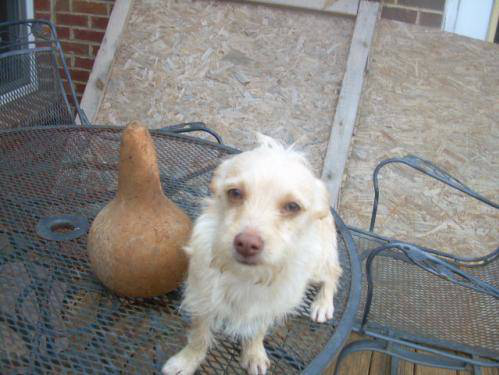

In [12]:
from PIL import Image
Image.open(test_path + filenames[17])

In [15]:
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

Now we are going to look at the following:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with the highest probability that they are correct)
4. The most incorrect labels of each class (ie those with the highest probability that are incorrect)
5. The most uncertain labels (ie those with the probability closest to 0.5)

In [16]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [17]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


In [18]:
filenames = val_batches.filenames
expected_labels = val_batches.classes 

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [19]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 46 correct labels


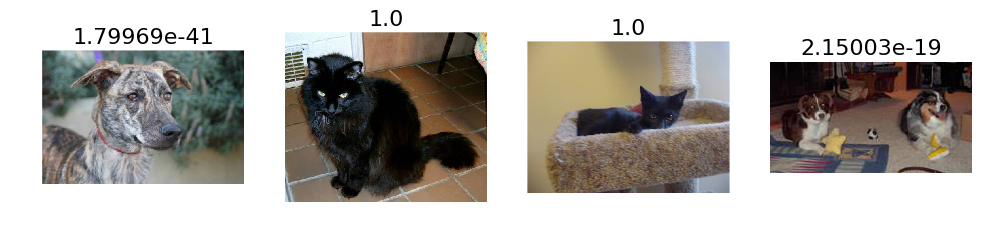

In [20]:
#1.A few correct labels at random 
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 2 incorrect labels


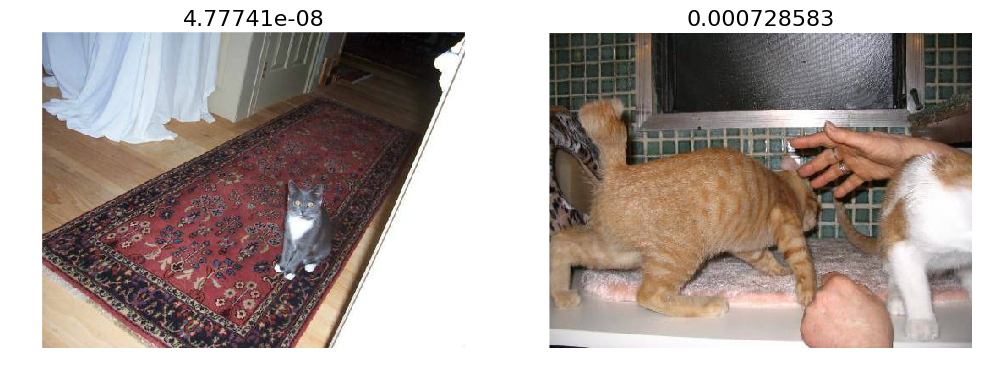

In [36]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels != expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 28 confident correct cats labels


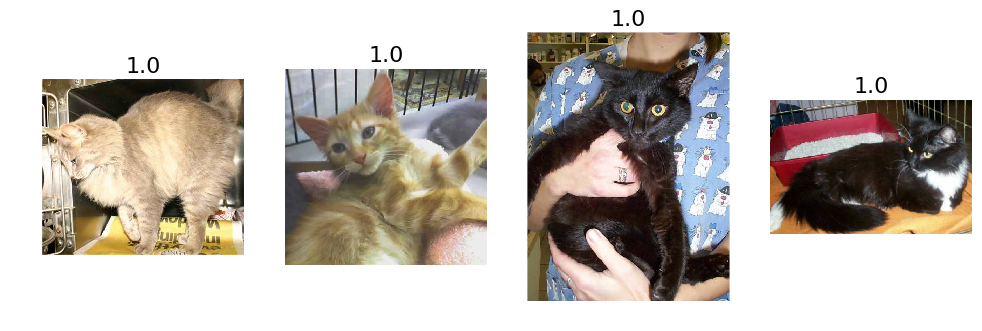

In [39]:
#3a. The images we were most confident were cats, and actually were cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 20 confident correct dog labels


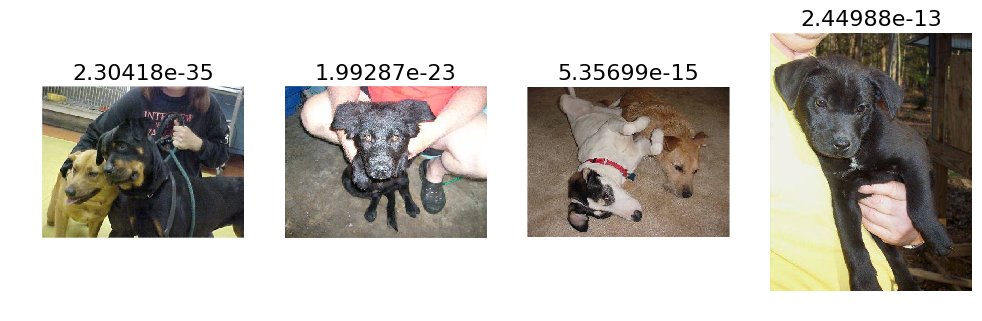

In [40]:
#3b. The images we were most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct dog labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs][:n_view])
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

In [23]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels == 0) & (our_labels != expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

Found 0 incorrect cats


Found 4 incorrect dogs


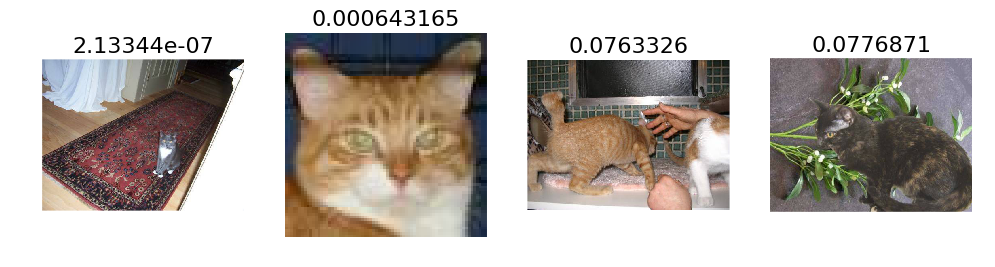

In [26]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

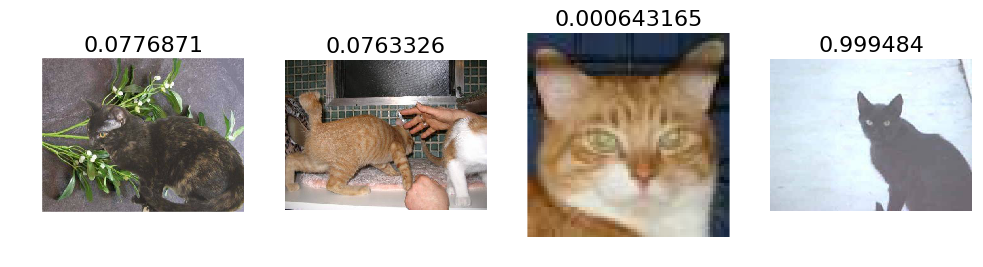

In [27]:
#The most uncertain labels (ie those with probability closest to 0.5)
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

# Confustion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

We can just print out the confusion matrix or show it in a graphical view

[[26  4]
 [ 0 20]]


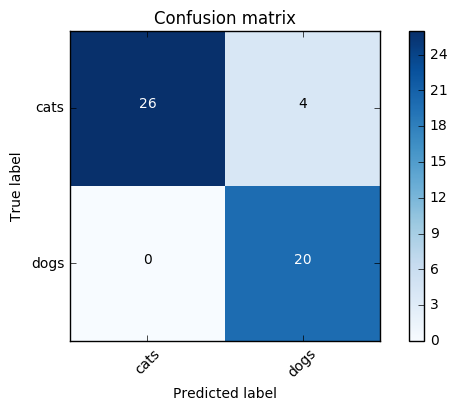

In [29]:
plot_confusion_matrix(cm, val_batches.class_indices)

# Submit Predictions to Kaggle

Here's the format Kaggle requires for new submissions:
imageId,isDog
1242, .3984
3947, .1000
4539, .9082
2345, .0000
Kaggle wants the imageId followed by the probability of the image being a dog. Kaggle uses a metric called Log Loss to evaluate your submission.

In [30]:
#Load our test predictions from file
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [33]:
#Grab the dog prediction column
isdog = preds[:1]
print "Raw Predictions: " +str(isdog[:5])
print "Mid Predictions: " +str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge Predictions: " + str(isdog[(isdog ==1) | (isdog == 0)])

Raw Predictions: [[  1.0000e+00   1.6158e-28]]
Mid Predictions: []
Edge Predictions: [ 1.]


## A look at log loss

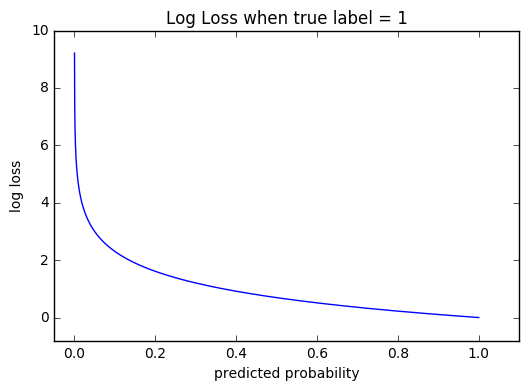

In [37]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probability that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

x = [i*.0001 for i in range(1,10000)]
y = [log_loss([1],[[i*.0001,1-(i*.0001)]],eps=1e-15) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()

In [38]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isdog = isdog.clip(min=0.05, max=0.95)

In [42]:
#Extract imageIds from the filenames in our test/unknown directory
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

Here we join the two columns into an array of [imageId, isDog]

In [44]:
subm = np.stack([ids, isdog], axis=1)
subm[:5]

ValueError: all input arrays must have the same shape

In [ ]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [ ]:
from IPYTHON.display import FileLink
%cd $LESSON_HOME_DIR
FileLink('data/redux/' + submission_file_name)